In [ ]:
import pandas as pd
answers = pd.read_csv("./output/answers.csv")
specs = pd.read_csv("./output/model_specs.csv")
answers.model_name.unique()


In [ ]:
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
colors = {"api": 'r', "local": 'b'}
handles = [mpatches.Patch(color=colors[i]) for i in colors]
labels = [i for i in colors]
specs.plot.bar(x="name", y="mean_answer_time", rot=45,ylabel="Mean Answer Time",xlabel="Name",title="Mean Latency",
               color=[colors[i] for i in specs['source']])
plt.legend(handles, labels)

specs


In [ ]:
answers['answer_len'] = answers['answer'].apply(len)

In [ ]:
answers.model_name.describe()

In [ ]:
import matplotlib.pyplot as plt
lens_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['answer_len'].apply(list)
cpu_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['cpu'].apply(list)
print(lens_by_model.keys())
for idx, val in enumerate(cpu_by_model.values):
    x1 = lens_by_model.values[idx]
    y1 = val
    plt.plot(x1, y1, label=lens_by_model.keys()[idx])


# Add labels and a title
plt.xlabel("Response Length")
plt.ylabel("CPU (%)")
plt.title("CPU by Response Length")
plt.xscale('log')
# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
lens_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['answer_len'].apply(list)
gpu_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['gpu'].apply(list)
for idx, val in enumerate(gpu_by_model.values):
    if gpu_by_model.keys()[idx] != "gpt-oss": # GPT-OSS was called first while the GPU was cooling down.

        if np.mean(val) >0:
            x1 = lens_by_model.values[idx]
            y1 = val
            plt.plot(x1, y1, label=lens_by_model.keys()[idx])


# Add labels and a title
plt.xlabel("Response Length")
plt.ylabel("GPU (%)")
plt.title("GPU by Response Length")
plt.xscale('log')
# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
lens_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['answer_len'].apply(list)
memory_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['memory'].apply(list)
for idx, val in enumerate(memory_by_model.values):
    if memory_by_model.keys()[idx] != "gpt-oss":
        if np.mean(val) >0:
            x1 = lens_by_model.values[idx]
            y1 = val
            plt.plot(x1, y1, label=lens_by_model.keys()[idx])


# Add labels and a title
plt.xlabel("Response Length")
plt.ylabel("Memory (%)")
plt.title("Memory by Response Length")
plt.xscale('log')
# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
lens_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['answer_len'].apply(list)
time_by_model = answers.sort_values(by=['model_name', 'answer_len']).groupby('model_name')['time'].apply(list)
for idx, val in enumerate(time_by_model.values):
    val_nums = [float(v) for v in val]
    if np.mean(val_nums) >0:
        x1 = lens_by_model.values[idx]
        y1 = val_nums
        plt.plot(x1, y1, label=lens_by_model.keys()[idx])


# Add labels and a title
plt.xlabel("Response Length")
plt.ylabel("Response Time (s)")
plt.title("Response Time by Response Length")
plt.xscale('log')
# Add a legend to differentiate the lines
plt.legend()

# Display the plot
plt.show()

In [ ]:
import pandas as pd
from io import StringIO

# -----------------------------------------------------------------
# 2.1  Either read from an actual file
# -----------------------------------------------------------------
# df_raw = pd.read_csv("your_file.csv", header=None)

# -----------------------------------------------------------------
# 2.2  …or, for this answer, build the same dataframe from a string
# -----------------------------------------------------------------
csv_string = """
,fleurs,librispeech,librispeech,local,librispeech,fleurs,fleurs,librispeech,local,local,librispeech,fleurs,local,local,local,fleurs,fleurs,fleurs,librispeech,local,fleurs,librispeech,local,librispeech
,whisper-large-v3-turbo,distil-large-v3.5,whisper-medium,whisper-small,whisper-tiny,whisper-tiny,distil-large-v2,whisper-large-v3-turbo,whisper-medium,whisper-tiny,whisper-tiny.en,whisper-small,distil-large-v2,distil-large-v3.5,whisper-large-v3-turbo,whisper-medium,whisper-base,distil-large-v3.5,whisper-base,whisper-base,whisper-tiny.en,whisper-small,whisper-tiny.en,distil-large-v2
avg_wer,0.08356889177964995,0.024446643843388752,0.03072005558291909,0.005547850208044381,0.07253816858398257,0.5613145113698402,1.0546057852231638,0.022562146276432694,0.005547850208044381,0.01752196024040684,0.05473794371941227,0.23335061329368859,0.005779010633379563,0.004160887656033285,0.004392048081368468,0.1336338940227705,0.43532237617356573,1.1177547628612767,0.0476727740515607,0.018816458622283865,6.806947491273759,0.039883660603947,0.012343966712898752,0.030930142184592356
avg_rtf,2.219244496402161,2.04989776321228,4.733922230741783,2.0199120373451387,0.2684758152026557,0.23459298816372326,1.1646500481649753,4.065873750036877,6.532167476060236,0.32583741968774155,0.22269565235575306,1.198858983461642,3.491610296147592,3.4509039839923803,6.895355341622393,3.3768036887563526,0.44927424509536307,1.1671004491812578,0.516649753875142,0.6968263866591303,0.8537933680488805,1.57234371270924630.2512180120095673,2.100002633001271
avg_cpu,2.219244496402161,2.04989776321228,4.733922230741783,2.0199120373451387,0.2684758152026557,0.23459298816372326,1.1646500481649753,4.065873750036877,6.532167476060236,0.32583741968774155,0.22269565235575306,1.198858983461642,3.491610296147592,3.4509039839923803,6.895355341622393,3.3768036887563526,0.44927424509536307,1.1671004491812578,0.516649753875142,0.6968263866591303,0.8537933680488805,1.5723437127092463,0.2512180120095673,2.100002633001271
"""

df_raw = pd.read_csv(StringIO(csv_string), header=None)
# -----------------------------------------------------------------
# 3.1  Separate the two header rows from the data
# -----------------------------------------------------------------
header_rows = df_raw.iloc[:2]          # rows 0 and 1 → our header information
data_rows   = df_raw.iloc[2:]          # everything from row 2 onward → real numbers

# -----------------------------------------------------------------
# 3.2  The first column of the CSV is just the index (empty for the
#      header rows, “avg_wer”, “avg_rtf”, … for the data rows).
#      Pull it out so it becomes a proper index for the final df.
# -----------------------------------------------------------------
data_rows = data_rows.set_index(0)     # turn column 0 into the index
data_rows.index.name = None           # clean up the name (optional)

# -----------------------------------------------------------------
# 3.3  Build *level‑0* (dataset) and *level‑1* (model) tuples.
#      The CSV contains blanks for repeated dataset names, so we
#      forward‑fill them first.
# -----------------------------------------------------------------
lvl0 = header_rows.iloc[0].ffill().tolist()   # ['fleurs', 'librispeech', ...]
lvl1 = header_rows.iloc[1].tolist()           # ['whisper‑large‑v3‑turbo', ...]

# Turn the two rows into a list of (lvl0, lvl1) tuples
col_tuples = list(zip(lvl0, lvl1))
print(col_tuples[1:])

# -----------------------------------------------------------------
# 3.4  Apply the MultiIndex to the *data* dataframe
# -----------------------------------------------------------------
data_rows.columns = pd.MultiIndex.from_tuples(col_tuples)

# -----------------------------------------------------------------
# 3.5  Quick sanity‑check – print the resulting df
# -----------------------------------------------------------------
print("\n=== DataFrame with a proper MultiIndex header ===")
print(data_rows.head())

[(nan, nan), ('fleurs', 'whisper-large-v3-turbo'), ('librispeech', 'distil-large-v3.5'), ('librispeech', 'whisper-medium'), ('local', 'whisper-small'), ('librispeech', 'whisper-tiny'), ('fleurs', 'whisper-tiny'), ('fleurs', 'distil-large-v2'), ('librispeech', 'whisper-large-v3-turbo'), ('local', 'whisper-medium'), ('local', 'whisper-tiny'), ('librispeech', 'whisper-tiny.en'), ('fleurs', 'whisper-small'), ('local', 'distil-large-v2'), ('local', 'distil-large-v3.5'), ('local', 'whisper-large-v3-turbo'), ('fleurs', 'whisper-medium'), ('fleurs', 'whisper-base'), ('fleurs', 'distil-large-v3.5'), ('librispeech', 'whisper-base'), ('local', 'whisper-base'), ('fleurs', 'whisper-tiny.en'), ('librispeech', 'whisper-small'), ('local', 'whisper-tiny.en'), ('librispeech', 'distil-large-v2')]


ValueError: Length mismatch: Expected axis has 24 elements, new values have 25 elements

In [3]:
import pandas as pd
df = pd.read_csv("a4_output/ab_test_results.csv")
df

,model,prompt
0,bark,Some
1,parler,Some
2,speech_t5,Some
3,gtts,Some
4,bark_lg,Some
...,...,...
193,gtts,Give
194,vits,Give
195,gtts,Give
196,speech_t5,Give


In [5]:
df.model.value_counts()

bark_lg      47
speech_t5    42
gtts         36
bark         35
parler       28
vits         10
Name: model, dtype: int64

{'vits': [1.9677972793579102, 0.48644542694091797, 0.6642379760742188, 0.46229982376098633, 0.44286131858825684, 0.6713852882385254, 0.46228504180908203, 0.41735124588012695, 0.49552392959594727, 0.5973870754241943, 0.7065043449401855, 0.5087823867797852, 0.4593038558959961, 0.44315266609191895, 0.44246411323547363], 'speech_t5': [2.292689561843872, 1.6735467910766602, 2.0272021293640137, 1.9832406044006348, 1.7068078517913818, 1.558779239654541, 2.1942408084869385, 1.7587883472442627, 1.9688901901245117, 1.7202329635620117, 1.7985408306121826, 2.253340005874634, 1.5390245914459229, 1.6418366432189941, 1.9545493125915527], 'parler': [12.877440929412842, 13.312597274780273, 14.2021005153656, 14.177908420562744, 13.291822671890259, 12.337177515029907, 16.67925214767456, 12.99654769897461, 16.677916288375854, 13.660380363464355, 15.475663661956787, 13.80686068534851, 11.149096488952637, 11.260225296020508, 13.085766077041626], 'bark_lg': [8.104800462722778, 18.534144401550293, 8.607442140

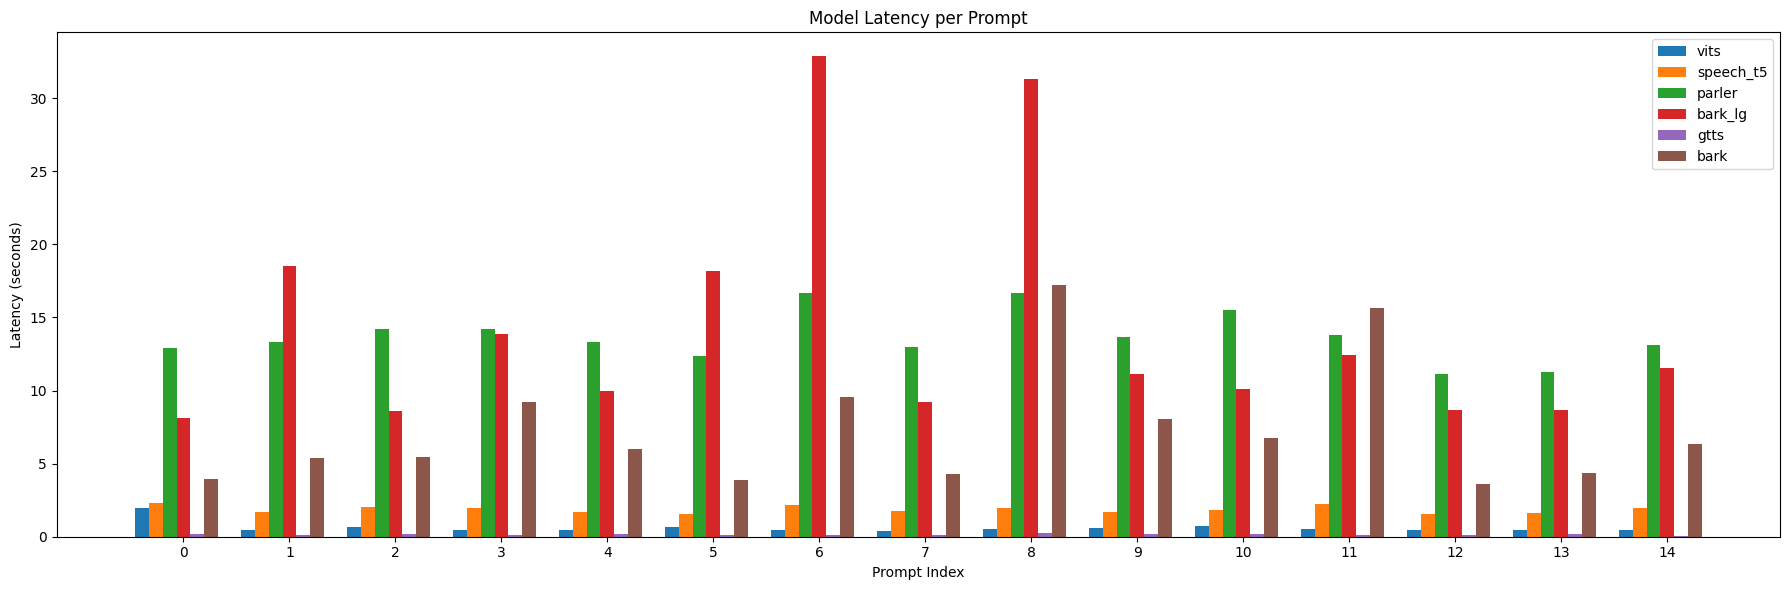

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json
with open("a4_output/latency.json", "r") as f:
    data = json.load(f)
    f.close()
print(data)

models = list(data.keys())
num_models = len(models)
num_prompts = len(next(iter(data.values())))

# X positions for prompts
x = np.arange(num_prompts)

# Width of each bar
bar_width = 0.13

plt.figure(figsize=(18, 6))

for i, model in enumerate(models):
    plt.bar(
        x + i * bar_width,
        data[model],
        width=bar_width,
        label=model
    )

plt.xlabel("Prompt Index")
plt.ylabel("Latency (seconds)")
plt.title("Model Latency per Prompt")
plt.xticks(x + bar_width * num_models / 2, range(num_prompts))
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
df = pd.read_csv("a4_output/encodec/guitar/stats.csv")
df

,n_codebooks,bitrate,compression_ratio,encoded_size,original_size
0,1,0.75,319.881439,2446,782430
1,2,1.50,159.940720,4892,782430
2,3,2.25,106.627146,7338,782430
3,4,3.00,79.970360,9784,782430
4,5,3.75,63.976288,12230,782430
5,6,4.50,53.313573,14676,782430
6,7,5.25,45.697348,17122,782430
7,8,6.00,39.985180,19568,782430
8,9,6.75,35.542382,22014,782430
9,10,7.50,31.988144,24460,782430


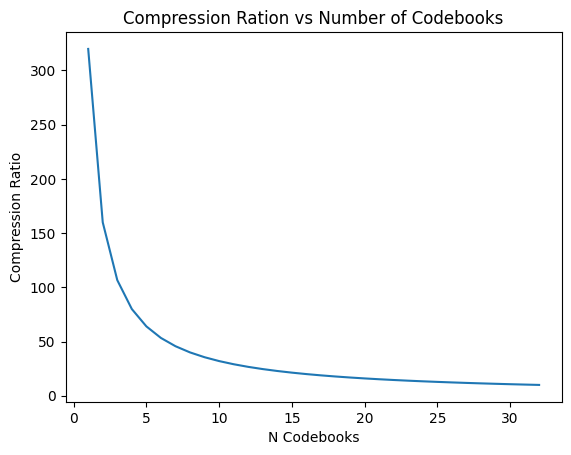

In [23]:
x_points = np.array(df.n_codebooks.to_list())
y_points = np.array(df.compression_ratio.to_list())

# Plot the points and connect them with a line
plt.plot(x_points, y_points)

# Add labels and title for clarity
plt.xlabel("N Codebooks")
plt.ylabel("Compression Ratio")
plt.title("Compression Ration vs Number of Codebooks")

# Display the plot
plt.show()